<a href="https://colab.research.google.com/github/humairasarwary/Automated-Trades--Cashew-Capital/blob/main/Benzinga_Preditions_Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install benzinga

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 4.0 MB/s eta 0:00:00
  Created wheel for benzinga: filename=benzinga-1.21-py3-none-any.whl size=12212 sha256=b22eba39fa2536506c63f72509af3b4d3a149a17608eb76737d5530cf5696a0e
  Stored in directory: /root/.cache/pip/wheels/54/90/98/31c6b9e221854508d3ffa6ebf3d155bcd49c211d3f52341b84
Successfully built benzinga
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentry-sdk 2.17.0 requires urllib3>=1.26.11, but you have urllib3 1.25.10 which is incompatible.


# Stock Trading Prediction Model with Hybrid Ensemble
# Hybrid Ensemble Model for Stock Trading Prediction: Integrating Machine Learning Classifiers and Stacking Techniques
Overview: This is a stock trading prediction model using a hybrid ensemble approach, combining Random Forest and Gradient Boosting classifiers. The notebook includes feature engineering for technical indicators, hyperparameter tuning, and visualizations to assess the model’s performance and provide insights into price trends.

# 1. Libraries and Data Preparation
Numpy and Pandas: For data handling and manipulation.
Matplotlib and Seaborn: For visualizations, including stock price trends, indicators, and model performance metrics.
Scikit-learn: For model building, hyperparameter tuning, and evaluation metrics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 2. Data Simulation
this step generates 500 simulated data points to mimic technical indicators often used in trading analysis:

MACD and MACD Histogram: Momentum indicators showing price trend direction.
RSI: Relative Strength Index, indicating overbought or oversold conditions.
Stochastic Oscillator (%K and %D): Indicator used to determine reversal points.
Close Price: Used to track the stock’s price over time.

In [ ]:
# Data Simulation (Replace with actual data if available)
np.random.seed(0)
data_size = 500  # Simulate 500 data points
data = {
    "macd": np.random.randn(data_size),
    "macd_hist": np.random.randn(data_size),
    "rsi": np.random.rand(data_size) * 100,
    "slowk": np.random.rand(data_size) * 100,
    "slowd": np.random.rand(data_size) * 100,
    "close": np.random.rand(data_size) * 100
}
df = pd.DataFrame(data)

# 3. Additional Feature Engineering ++ Label Creation for Buy/Sell Signals
the model’s predictive features:

Momentum: Measures price direction over time, helping capture upward or downward trends.
Daily Return: Percentage change in the stock's price between consecutive days.
Volatility: Calculated over a 20-day window to reflect price variability.

target labels indicating:

1: A "buy" signal (when the future close price is higher than the current close price).
0: A "hold" or "sell" signal (when the future close price is not higher than the current price).


In [ ]:
# Calculate additional indicators for more insight
df['momentum'] = df['close'].diff()  # Price momentum
df['daily_return'] = df['close'].pct_change() * 100  # Daily returns in percentage
df['volatility'] = df['close'].rolling(window=20).std()  # 20-day rolling volatility

# Generate Labels for Buy/Sell Signal
df["future_close"] = df["close"].shift(-1)  # Predicting next close price
df["signal"] = np.where(df["future_close"] > df["close"], 1, 0)  # 1 for buy, 0 for hold/sell


In [ ]:
# Drop NaN values from shift operation
df.dropna(inplace=True)

# 5. Feature and Label Preparation
X: The feature set includes MACD, RSI, Stochastic Oscillator, momentum, daily return, and volatility.

y: The target variable (signal) to be predicted.

Train-Test Split: Divides the data into 80% for training and 20% for testing.

In [ ]:
# Prepare Features and Labels
features = ["macd", "macd_hist", "rsi", "slowk", "slowd", "momentum", "daily_return", "volatility"]
X = df[features]
y = df["signal"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Hyperparameter Tuning with Grid Search
Random Forest Parameters: n_estimators (number of trees) and max_depth (depth of trees).

Gradient Boosting Parameters: n_estimators and max_depth as well.

Grid Search with cross-validation (cv=3) improves model performance by finding the best configuration.

In [ ]:
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [4, 6, 8]}
param_grid_gb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3)
gb_model = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3)


# 7. Model Training and Best Parameter Output
This step trains both models using optimal parameters found by Grid Search. It then displays the best parameters, which improve model accuracy and robustness.

In [ ]:
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_model.best_params_)
print("Best parameters for Gradient Boosting:", gb_model.best_params_)

Best parameters for Random Forest: {'max_depth': 4, 'n_estimators': 150}
Best parameters for Gradient Boosting: {'max_depth': 3, 'n_estimators': 50}


# 8. Hybrid Model Prediction and Accuracy
calculates and combines predictions:

rf_pred and gb_pred: Predicted probabilities for the "buy" class from each model.

hybrid_pred: Average of probabilities from both models to create a final decision.

This hybrid model uses both models’ strengths for improved accuracy. The classification report provides metrics like precision, recall, and F1-score.

In [ ]:
rf_pred = rf_model.predict_proba(X_test)[:, 1]
gb_pred = gb_model.predict_proba(X_test)[:, 1]
hybrid_pred = (rf_pred + gb_pred) / 2 > 0.5
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)
print(classification_report(y_test, hybrid_pred))

Hybrid Model Accuracy: 0.7083333333333334
              precision    recall  f1-score   support

           0       0.65      0.82      0.73        45
           1       0.79      0.61      0.69        51

    accuracy                           0.71        96
   macro avg       0.72      0.72      0.71        96
weighted avg       0.73      0.71      0.71        96



# 9. Confusion Matrix
The confusion matrix visualizes model performance by showing:

True Positives (TP): Correctly predicted buys.

True Negatives (TN): Correctly predicted hold/sells.

False Positives (FP) and False Negatives (FN): Errors in prediction.

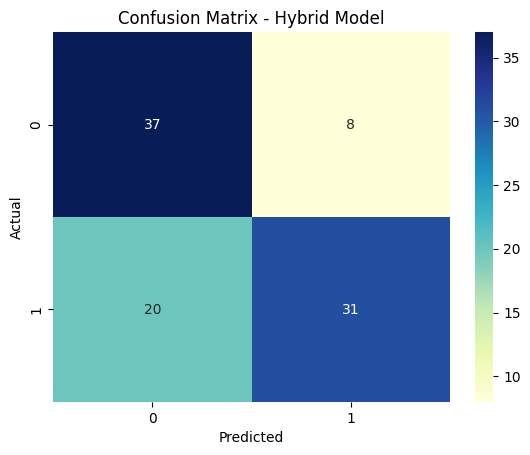

In [ ]:
conf_matrix = confusion_matrix(y_test, hybrid_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix - Hybrid Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Visualization of Indicators and Trends
This block creates four plots for indicators:

Close Price: Price movement over time.

MACD and MACD Histogram: Tracks trend direction and strength.

RSI: Highlights overbought (above 70) and oversold (below 30) conditions.

Volatility: A 20-day rolling standard deviation for risk assessment.

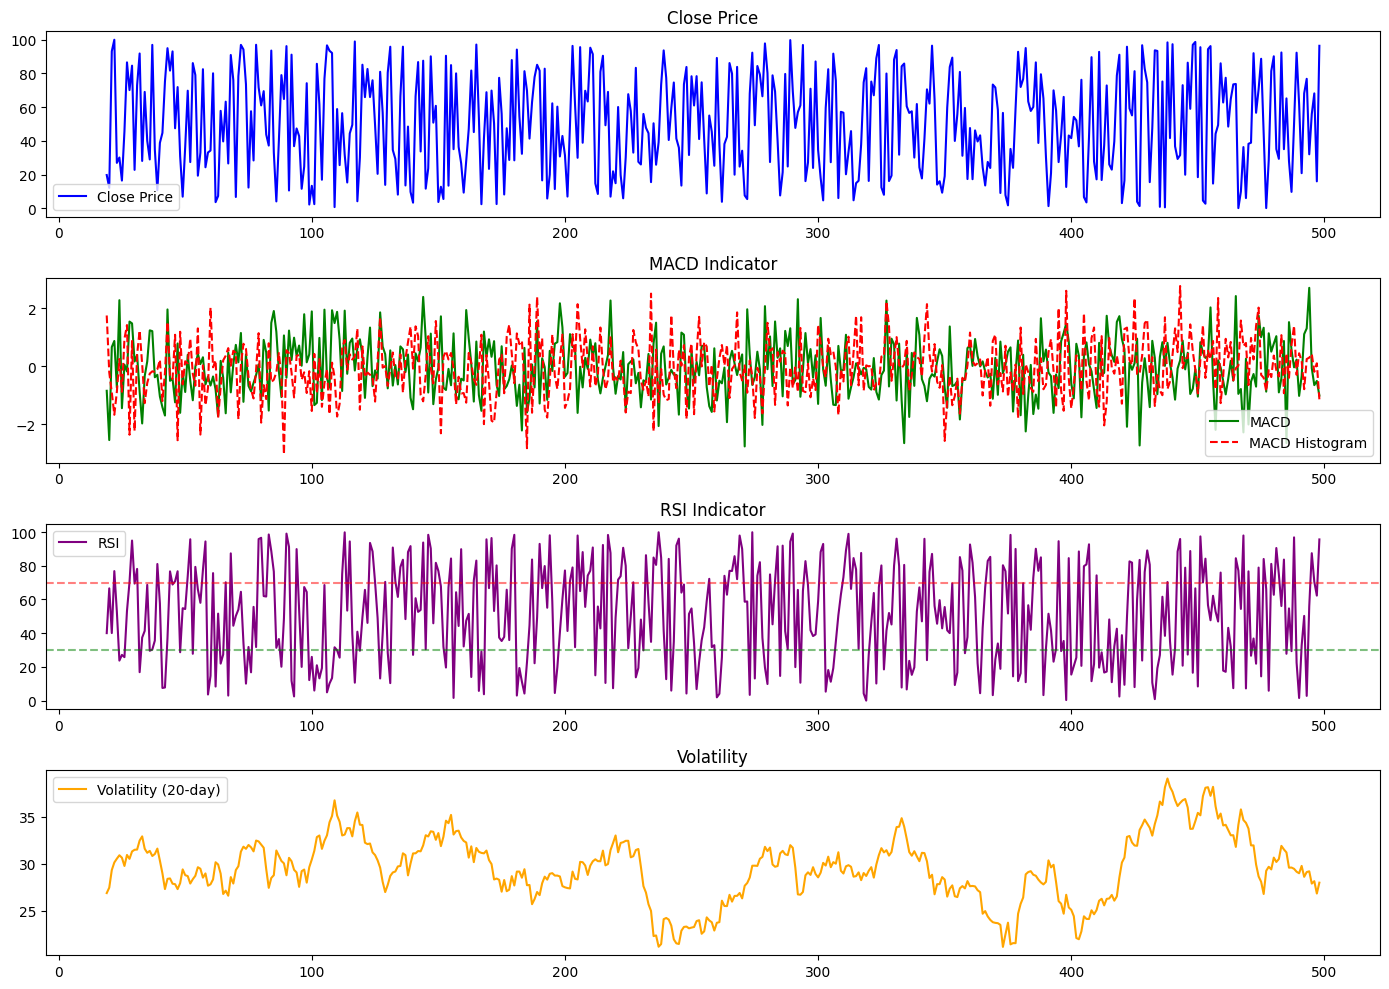

In [ ]:
plt.figure(figsize=(14, 10))

# Close Price Plot
plt.subplot(4, 1, 1)
plt.plot(df.index, df["close"], color="blue", label="Close Price")
plt.title("Close Price")
plt.legend()

# MACD Plot
plt.subplot(4, 1, 2)
plt.plot(df.index, df["macd"], color="green", label="MACD")
plt.plot(df.index, df["macd_hist"], color="red", linestyle='--', label="MACD Histogram")
plt.title("MACD Indicator")
plt.legend()

# RSI Plot
plt.subplot(4, 1, 3)
plt.plot(df.index, df["rsi"], color="purple", label="RSI")
plt.axhline(70, linestyle="--", color="red", alpha=0.5)  # Overbought
plt.axhline(30, linestyle="--", color="green", alpha=0.5)  # Oversold
plt.title("RSI Indicator")
plt.legend()

# Volatility Plot
plt.subplot(4, 1, 4)
plt.plot(df.index, df["volatility"], color="orange", label="Volatility (20-day)")
plt.title("Volatility")
plt.legend()

plt.tight_layout()
plt.show()


# 11. Distribution of Daily Returns
This histogram shows the distribution of daily returns to understand return trends, which can help in assessing risk and return probability.

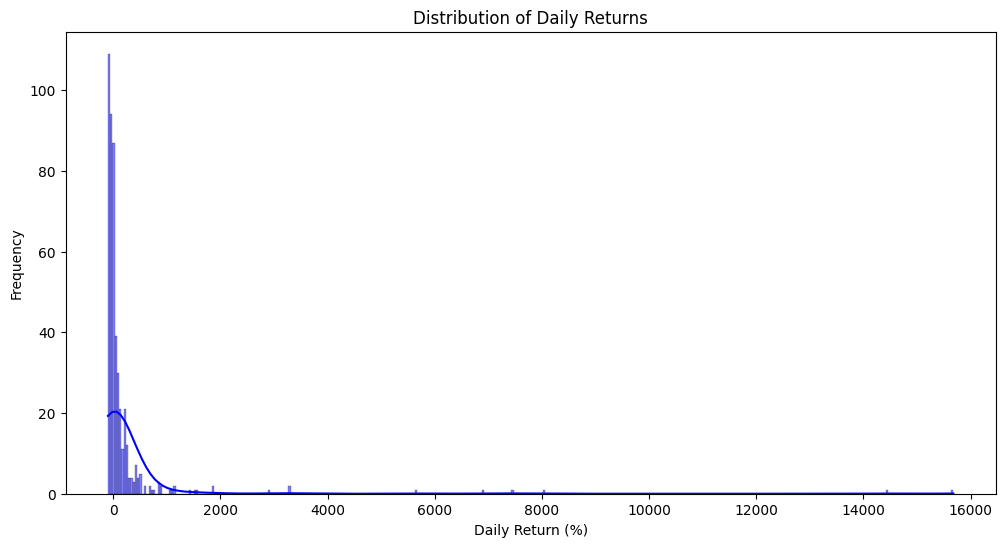

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['daily_return'], kde=True, color="blue")
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.show()


# 12. Additional Models and Predictions
Add more classifiers: Logistic Regression, Support Vector Classifier (SVC), and AdaBoost. Finally, we create a Stacking Classifier to combine the predictions from these models, alongside the previously implemented RandomForest and GradientBoosting models.

Logistic Regression: A straightforward linear classifier that estimates probabilities of class membership. Logistic regression works well as a baseline classifier.

Support Vector Classifier (SVC): SVC can capture non-linear relationships by using kernel functions. It often provides good performance on binary classification tasks.

AdaBoost Classifier: This boosting technique sequentially builds multiple weak learners (typically decision stumps) to improve accuracy. AdaBoost is effective in reducing bias and can adapt well to different types of data.

Stacking Classifier: This ensemble technique combines several base models to make a final prediction. Here, the StackingClassifier combines RandomForest, GradientBoosting, Logistic Regression, SVC, and AdaBoost classifiers, with a final Logistic Regression model to make the ultimate prediction based on all the individual models’ outputs.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6145833333333334
              precision    recall  f1-score   support

           0       0.59      0.58      0.58        45
           1       0.63      0.65      0.64        51

    accuracy                           0.61        96
   macro avg       0.61      0.61      0.61        96
weighted avg       0.61      0.61      0.61        96

Support Vector Classifier Accuracy: 0.6354166666666666
              precision    recall  f1-score   support

           0       0.64      0.51      0.57        45
           1       0.63      0.75      0.68        51

    accuracy                           0.64        96
   macro avg       0.64      0.63      0.63        96
weighted avg       0.64      0.64      0.63        96



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier Accuracy: 0.6354166666666666
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        45
           1       0.68      0.59      0.63        51

    accuracy                           0.64        96
   macro avg       0.64      0.64      0.64        96
weighted avg       0.64      0.64      0.64        96



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

Stacking Classifier Accuracy: 0.6354166666666666
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        45
           1       0.67      0.61      0.64        51

    accuracy                           0.64        96
   macro avg       0.64      0.64      0.64        96
weighted avg       0.64      0.64      0.64        96



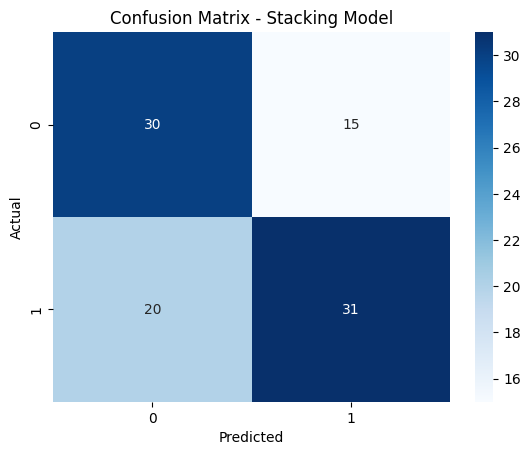

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier

# Initialize Additional Models
logistic_model = LogisticRegression(random_state=42)
svc_model = SVC(probability=True, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train and Evaluate Logistic Regression
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))
print(classification_report(y_test, logistic_pred))

# Train and Evaluate Support Vector Classifier
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("Support Vector Classifier Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

# Train and Evaluate AdaBoost Classifier
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, ada_pred))
print(classification_report(y_test, ada_pred))

# Initialize and Train Stacking Classifier with a Logistic Regressor as the final estimator
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('logistic', LogisticRegression(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42))
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

# Predictions and Evaluation for Stacking Classifier
stacking_pred = stacking_model.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_pred))
print(classification_report(y_test, stacking_pred))

# Confusion Matrix for Stacking Model
conf_matrix_stack = confusion_matrix(y_test, stacking_pred)
sns.heatmap(conf_matrix_stack, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Stacking Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
